In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
df = pd.read_csv('diabetes.csv')
# 판다스 > 넘파이로 변경
# pandas: 숫자,문자,날짜
# numpy: 숫자
np_arr = df.to_numpy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info() # null값이 있는가!? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['SkinThickness'] < 5
df[df['SkinThickness'] < 5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [5]:
# df.Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

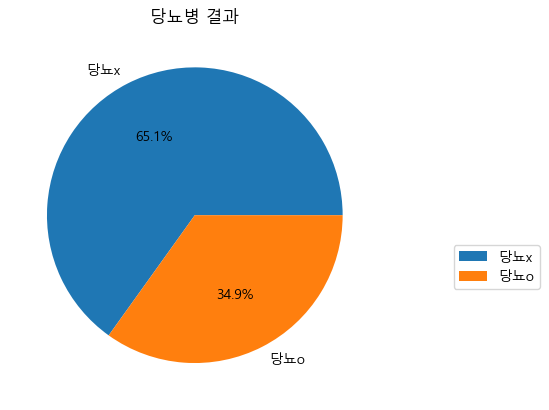

In [6]:
# pie 그래프를 출력
label = ('당뇨x','당뇨o')
plt.pie(df['Outcome'].value_counts(),labels=label,autopct='%.1f%%')
plt.title('당뇨병 결과')
plt.legend(loc=(1.2,0.3))

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_11200\3036788143.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=axs[0,0])
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_11200\3036788143.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'],ax=axs[0,1])


KeyError: 'AGlucosege'

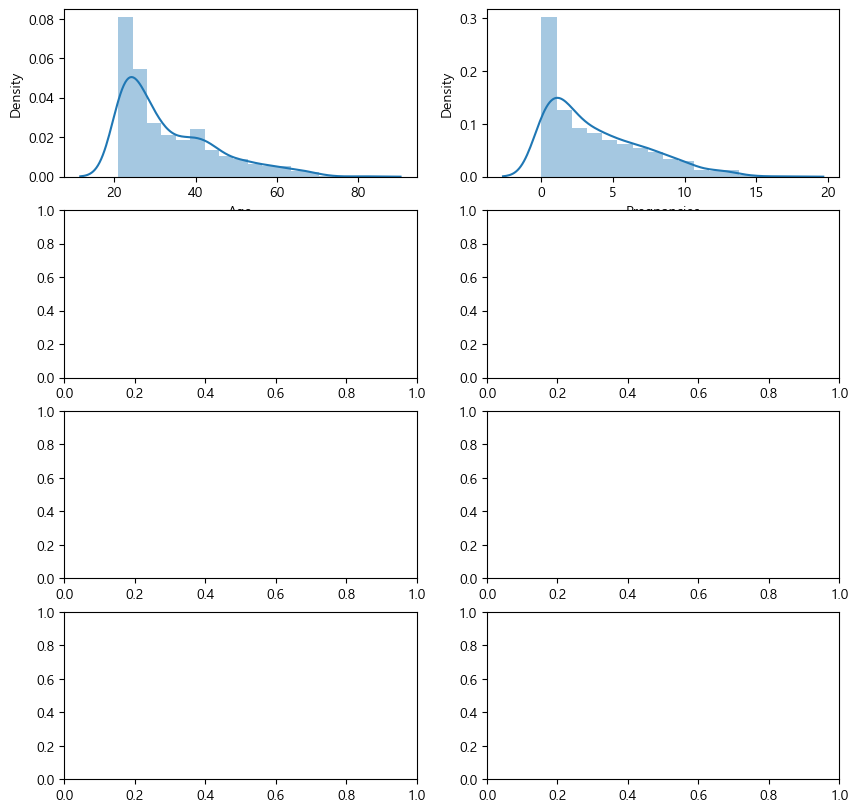

In [8]:
# 각 특성별 그래프 출력
import seaborn as sns
fig,axs = plt.subplots(4,2,figsize=(10,10))
# axs[0,0].bar(df['Age'],df.index)
# 다이어그램 x,y축을 넣어서 ㅎ ㅏ는것이 아니라,
# x축 데이터만 입력하면 그래프 출력
sns.distplot(df['Age'],ax=axs[0,0])
sns.distplot(df['Pregnancies'],ax=axs[0,1])
sns.distplot(df['AGlucosege'],ax=axs[1,0])
sns.distplot(df['BloodPressure'],ax=axs[1,1])
sns.distplot(df['SkinThickness'],ax=axs[2,0])
sns.distplot(df['Insulin'],ax=axs[2,1])
sns.distplot(df['BMI'],ax=axs[3,0])
sns.distplot(df['DiabetesPedigreeFunction'],ax=axs[3,1])
plt.show()

<Axes: >

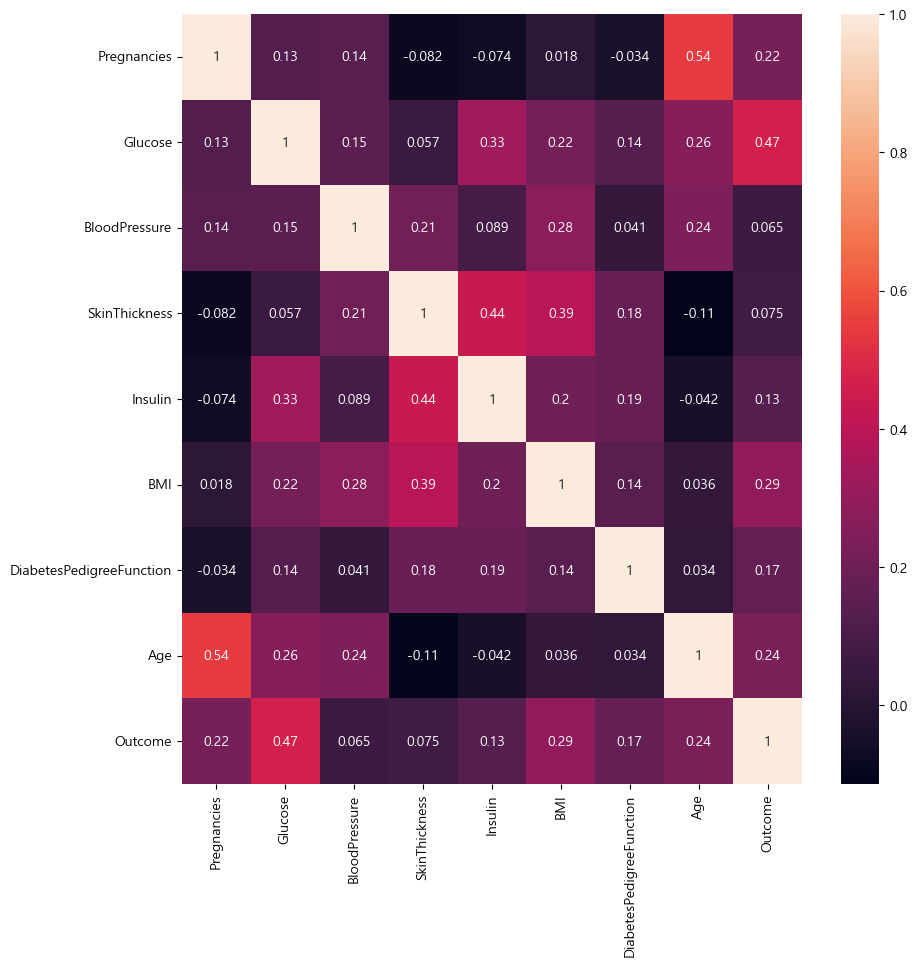

In [11]:
plt.figure(figsize=(10,10))
# annot=True: 각 특성별 수치입력
sns.heatmap(df.corr(),annot=True)
# 각 특성별 영향도를 확인하는 함수

In [15]:
# 머신러닝
# 1. 데이터 전처리: train, test세트 분리
results = df['Outcome']
data = df.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
train_input,test_input,train_target_test_target = train_test_split(
    data,results)
        

In [ ]:
# 학습하기

# 예측하기

# 예측률